**Important:** Each notebook can be executed independently and does not rely on running the others.

## 0. Installing and Importing the Necessary Libraries

In [ ]:
#!pip install langdetect
#!pip install ipython
#!pip install deep_translator
#!pip install wordcloud

In [ ]:
# Importing all the libraries that will be necessary throughout the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import re

from langdetect import detect
from IPython import display
from deep_translator import GoogleTranslator

from wordcloud import WordCloud

## 1. Data Exploration

We start by allowing Google Colab to access our Google Drive and the import the necessary datasets that are going to be used throughout the project.

### 1.1. Importing the Training and Test Set

In [ ]:
# Allowing access to our Google Drive where the original datasets are stored.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the datasets.
df_train_reviews_original = pd.read_excel('/content/drive/MyDrive/Text Mining Project/Original Train Dataset (Original, Translated, Pre-Processed))/Original/train_reviews.xlsx')
df_train_original = pd.read_excel('/content/drive/MyDrive/Text Mining Project/Original Train Dataset (Original, Translated, Pre-Processed))/Original/train.xlsx')
df_test_reviews_original = pd.read_excel('/content/drive/MyDrive/Text Mining Project/Test Dataset (Original, Translated, Pre-Processed)/Original/test_reviews.xlsx')
df_test_original = pd.read_excel('/content/drive/MyDrive/Text Mining Project/Test Dataset (Original, Translated, Pre-Processed)/Original/test.xlsx')

### 1.2. Data Summary

Obtaining a general overview of the data. Checking the number of observations, columns, and data types in each dataframe.

In [ ]:
# Having a first look at our "df_train_reviews_original" DataFrame.
df_train_reviews_original.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [ ]:
# The Training DataFrame "df_train_reviews_original" has information about 721402 comments
# being each one of them attached to an "index" which is unique identifier of an
# Airbnb listing.
df_train_reviews_original.shape

(721402, 2)

In [ ]:
# Checking the datatype of each one of the columns.
df_train_reviews_original.dtypes

index        int64
comments    object
dtype: object

In [ ]:
# Checking for duplicate rows in the "df_train_reviews_original".
df_train_reviews_original[df_train_reviews_original.duplicated(subset=["index", "comments"], keep=False)]

,index,comments
3248,61,Excelente!
3254,61,Excelente!
4225,70,Everything was great!
4263,70,Everything was great!
6584,144,"Sofia is an incredible host, and made us feel ..."
...,...,...
720042,12464,Boa localização.
721175,12493,Great location!
721188,12493,Great location!
721195,12494,.


In [ ]:
# Having a first look at our "df_train_original" DataFrame.
df_train_original.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [ ]:
# The Training DataFrame "df_train_original" has 12496 Airbnb listing. Each one of them has a "description" which presents
# a brief description about the Airbnb and a "host_about" field, which presents some basic information about the host. As this
# is the training set we also have a label assigned to each one of the Airbnb listings, this label tells us if each specific
# Airbnb was listed or not in the upcoming quarter. A target of 0 means that it wasn't unlisted, and a target of 1 means that
# it was unlisted.
df_train_original.shape

(12496, 4)

In [ ]:
# Checking the datatype of each one of the columns.
df_train_original.dtypes

index           int64
description    object
host_about     object
unlisted        int64
dtype: object

In [ ]:
# Checking for duplicate rows in the "df_train_original".
df_train_original[df_train_original.duplicated(keep=False)]

,index,description,host_about,unlisted


In [ ]:
# Having a first look at our "df_test_reviews_original" DataFrame.
df_test_reviews_original.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [ ]:
# The Test DataFrame "df_test_reviews_original" has information about 80877 comments
# being each one of them attached to an "index" which is unique identifier of an
# Airbnb listing. This will be a useful feature to predict if a Airbnb will be listed or
# not in the upcoming quarter.
df_test_reviews_original.shape

(80877, 2)

In [ ]:
# Checking the datatype of each one of the columns.
df_test_reviews_original.dtypes

index        int64
comments    object
dtype: object

In [ ]:
# Checking for duplicate rows in the "df_test_reviews_original".
df_test_reviews_original[df_test_reviews_original.duplicated(keep=False)].head()

,index,comments
1622,42,Great place
1645,42,Great place
8862,155,Good
8884,155,Good
11302,178,Great place!


In [ ]:
# Having a first look at our "df_test_original" DataFrame.
df_test_original.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [ ]:
# The Test DataFrame "df_test_original" has 1389 Airbnb listing. Each one of them has a "description" which presents
# a brief description about the Airbnb and a "host_about" field, which presents some basic information about the host.
# Our challenge will be to predict for each one of these Airbnb listing, which ones will be listed or not in the upcoming
# quarter.
df_test_original.shape

(1389, 3)

In [ ]:
# Checking the datatype of each one of the columns.
df_test_original.dtypes

index           int64
description    object
host_about     object
dtype: object

In [ ]:
# Checking for duplicate rows in the "df_test_original".
df_test_original[df_test_original.duplicated(keep=False)]

,index,description,host_about


**Conclusion:** During this chapter we started to get a better sense of the data. The "df_train_reviews_original" has 721402 comment for some of the 12496 Airbnb's that make part of the "df_train_original". The "df_train_original" also presents a "description" and a "host_about" column for each one of these Airbnb's. Out of the 721402 there are 290 pairs of repeated comments that we are not going to consider an error or a duplicate row by mistake. It is very possible for the same Airbnb to have equal comment for one of the following two reasons: The first one is that if it is a simple comment made with 2/3 words the probability of it being a repeated comment is very big. The second reason is that even if its a bigger comment it can be that a couple copy pasted the answer of one another, and that's fine and should count as two comments for our future model. Then, we performed the same analysis for the "df_test_reviews_original", which has 80877 comments made across the different 1389 Airbnb's present in the "df_test_original". These are the Airbnb's that we have to predict if will be listed or not in the upcoming quarter. They also present some repeated comments and we won't deal with them because first they are part of the test set and we shouldn't clear outliers of the final test, second we believe this repeated comments happen because of the reasons previously explained for the training set.

### 1.3. Target Distribution

Examining the distribution of the target variable. Determining the balance between listed and unlisted for the upcoming quarter. In case of unbalance we may have to oversample or undersample during the pre-processing step.

In [ ]:
# This analysis will only be done by acessing the DataFrame "df_train_original", as we only have access
# to the labels from the training set. Our task will be to predict the labels for the test set.

label_balance = df_train_original["unlisted"].value_counts()

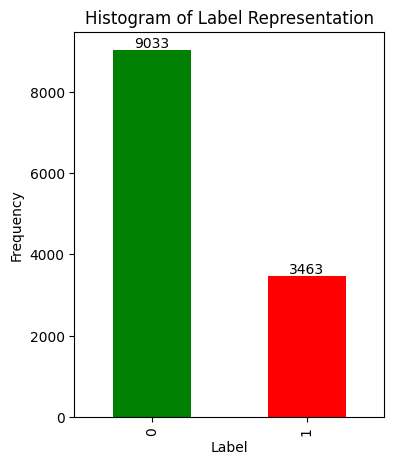

In [ ]:
# Defining the colors.
colors = ["green", "red"]

# Setting the desired figure size.
fig, ax = plt.subplots(figsize=(4,5))

# Plotting the histogram.
ax = label_balance.plot.bar(color=colors)

# Setting labels and title.
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.title("Histogram of Label Representation")

# Adding the values on top of each bar.
for i,v in enumerate(label_balance):
  ax.text(i, v, str(v), ha="center", va="bottom")

# Displaying the plot.
plt.show()

**Conclusion:** We can conclude that we have a very unbalanced dataset, and we will have to deal with this later. If we want to get a balanced dataset maybe the solution will be to undersample the majority class or to oversample the minority class. 72,3% of the observations have stayed listed, while 27,7% was unlisted in the following quarter. We will adress this unbalancing during model training by using class weights.

### 1.4. Exploring Language Patterns

From the "1.2. Data Summary" Section we were able to notice that we have several languages in our dataset. This applies for all the 3 textual fields we have, which are the "descriptions", "host_about", and "comments". In this section we are going to verify the most used languages and if there is any difference between the languages used in the three fields.

In [ ]:
# Initiating a dictionary that will receive as key the index and as value the languages for the "descriptions" textual field.
languages_descriptions = {}

# Initiating a for-loop that will fill the previously created dictionary.
for index, phrase in enumerate(list(df_train_original["description"])):
  languages_descriptions[index] = detect(phrase)

In [ ]:
# Creating a DataFrame from the values of the dictionary.
df_descriptions_languages = pd.DataFrame(list(languages_descriptions.values()), columns=["Language"])

# Counting the different languages.
language_descriptions_counts = df_descriptions_languages["Language"].value_counts()
language_descriptions_counts.head(10)

en    10205
pt     1844
fr      152
da      124
de       87
es       48
sv        7
ca        7
no        5
nl        5
Name: Language, dtype: int64

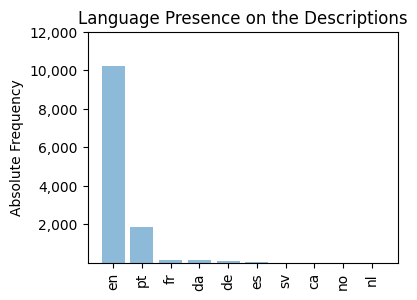

In [ ]:
# Creating a bar chart with the results of the previous analysis.
x_labels = language_descriptions_counts.index[0:10]
values = language_descriptions_counts[:10]
plt.figure(figsize=(4,3))
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.yticks([2000, 4000, 6000, 8000, 10000, 12000],
           ['2,000', '4,000', '6,000', '8,000', '10,000', '12,000'])
plt.xticks(x_labels)
plt.ylabel('Absolute Frequency')
plt.title('Language Presence on the Descriptions')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Initiating a dictionary that will receive as key the index and as value the languages for the "host_about" textual field.
languages_host_about = {}

# Initiating a for-loop that will fill the previously created dictionary.
for index, phrase in enumerate(list(df_train_original["host_about"])):
  try:
    languages_host_about[index] = detect(phrase)
  except Exception:
    languages_host_about[index] = "not a word"

In [ ]:
# Creating a DataFrame from the values of the dictionary.
df_host_about_languages = pd.DataFrame(list(languages_host_about.values()), columns=["Language"])

# Counting the different languages.
language_host_about_counts = df_host_about_languages["Language"].value_counts()
language_host_about_counts.head(10)

en            8898
pt            2530
fr             277
es             169
not a word     131
de             106
it              83
ca              64
zh-cn           56
so              36
Name: Language, dtype: int64

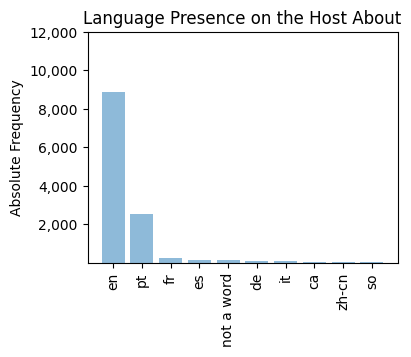

In [ ]:
# Creating a bar chart with the results of the previous analysis.
x_labels = language_host_about_counts.index[0:10]
values = language_host_about_counts[:10]
plt.figure(figsize=(4,3))
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.yticks([2000, 4000, 6000, 8000, 10000, 12000],
           ['2,000', '4,000', '6,000', '8,000', '10,000', '12,000'])
plt.xticks(x_labels)
plt.ylabel('Absolute Frequency')
plt.title('Language Presence on the Host About')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Initiating a dictionary that will receive as key the index and as value the languages for the "comments" textual field.
languages_comments = {}

# Initiating a for-loop that will fill the previously created dictionary. We will only iterate over the first 12496 comments
# as it would be very computationally inefficient to iterate over the +700k comments. We chose this number so we have the same
# number of textual fields as the "host_about" and "descriptions" field.
for index, phrase in enumerate(list(df_train_reviews_original["comments"])[:12496]):
  try:
    languages_comments[index] = detect(phrase)
  except Exception:
    languages_comments[index] = "not a word"

In [ ]:
# Creating a DataFrame from the values of the dictionary.
df_comments_languages = pd.DataFrame(list(languages_comments.values()), columns=["Language"])

# Counting the different languages.
language_comments_counts = df_comments_languages["Language"].value_counts()
language_comments_counts.head(10)

en            7884
fr            1868
pt             864
es             698
de             501
it             199
nl             132
ru              56
ro              42
not a word      37
Name: Language, dtype: int64

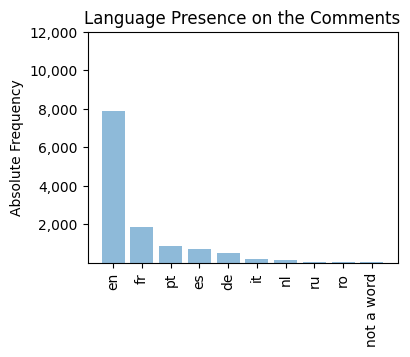

In [ ]:
# Creating a bar chart with the results of the previous analysis.
x_labels = language_comments_counts.index[0:10]
values = language_comments_counts[:10]
plt.figure(figsize=(4,3))
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.yticks([2000, 4000, 6000, 8000, 10000, 12000],
           ['2,000', '4,000', '6,000', '8,000', '10,000', '12,000'])
plt.xticks(x_labels)
plt.ylabel('Absolute Frequency')
plt.title('Language Presence on the Comments')
plt.xticks(rotation=90)
plt.show()

**Conclusion:** We can draw some nice conclusion from this analyses. We can see that we have more than 10,000 Airbnb Descriptions in English and less than 2,000 in Portuguese. Now if we look at the Airbnb Host About we can see that the number of Host Abou's written in English decrease to less than 9,000, while the Portuguese ones grow well over 2,000, meaning that when talking about themselves, this hosts prefer to express them probably in their home language which is the Portuguese. Finally when looking at the language of the comments we have around 8,000 English comments, but a new language appears here which is the French, with around 2,000 comments, meaning that these are the preferred languages of the people that visit the Airbnb's. The portuguese language in the comments section is only represented in 800 comments, which makes sense, since we expect the Airbnb's to be used more by tourists that speak different languages from the one spoken in Portugal.

### 1.5. Comments Field Analysis

Checking the length of the comments in the reviews dataframe. Then, we perform a word analysis of the most used words in these comments. Finally, we analyse the number of comments made by Airbnb listing. For all of these we will try to understand better the distribution and will compute some basic descriptive statistics to get a better sense of the data (mean, median, quartiles, min, max).

#### 1.5.1. Comments Length Analysis

In [ ]:
# Selecting the column of "comments" from the "df_train_reviews_original".
all_comments = df_train_reviews_original["comments"]

# Opening an empty dictionary that will receive the index and the size in
# terms of words of each one of the comments.
number_words = {}

# Starting a for loop that will iterate over every comment.
for number, comment in enumerate(all_comments):

  # Transforming every comment on a string as we will need it to then use the
  # .split method.
  string_comment = str(comment)

  # Splitting every string on :" ", ".", and "-".
  comment_splited = re.split(r'\s|,|-|，', string_comment)

  # Counting the number of words of every comments and storing its value on the
  # previously created dictionary.
  number_words[number] = len(comment_splited)

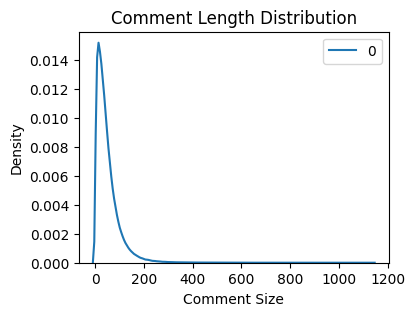

In [ ]:
# Initializing the size of our density graph.
plt.figure(figsize=(4,3))

# Initiating the density graph. Setting the name of the label and choosing green as a color.
sns.kdeplot(data = number_words.values(), label="Comment Length Distribution", color="green")

# Formatting the title and the labels.
plt.xlabel("Comment Size")
plt.ylabel("Density")
plt.title("Comment Length Distribution")

# Plotting the graph.
plt.show()

In [ ]:
# Creating a DataFrame that has all the elements of the original "df_train_reviews_original"
# but now also has the number of words of each one of the comments made.
comments_size_df = pd.DataFrame({"index": list(df_train_reviews_original["index"]), "comments":list(all_comments), "size":list(number_words.values())})

In [ ]:
# Presenting the new "comments_size_df" DataFrame.
comments_size_df.head()

,index,comments,size
0,1,this is a very cozy and comfortable house to s...,28
1,1,good<br/>,1
2,1,"My first hostel experience, and all I have to ...",278
3,1,Das Hostel war neu und deshalb funktionierte a...,87
4,1,"It was fine for a dorm, but I think for the pe...",28


In [ ]:
# Sorting by order of the "size" column as we want to have a look at which
# are the smaller and longer comments. At first sight it looks like longer comments
# are used to show deception about a specific Airbnb. Later in the chapter of exploration
# we are still going to check if there is a correlation between the size of the comments
# and an Airbnb to be unlisted in the following quarter.
comments_size_df.sort_values(by="size")

,index,comments,size
562560,9665,.,1
333680,5780,Nice!,1
369581,6397,Amazing!,1
260679,4469,👍,1
65204,1100,Great!,1
...,...,...,...
632817,10986,"This apartment is for challenges, not for rela...",1064
120285,2039,This is the first bad review I have ever writt...,1072
145075,2465,"Longe de atender minhas espectativas, vou come...",1072
478814,8253,This feedback and review is based on our stay ...,1104


In [ ]:
# We can see that the average comment has about 50 words. The standard deviation is also
# 50 words. The smallest and longest review have the size of 1 word and 1137 words, respectively.
# The 1st quartile is 18 words, the second quartile is 37 words, and the third quartile is 66 words.
comments_size_df["size"].describe()

count    721402.000000
mean         50.163656
std          49.168642
min           1.000000
25%          18.000000
50%          37.000000
75%          66.000000
max        1137.000000
Name: size, dtype: float64

**Conclusion:** From the control length analysis we were able to take several conclusions. The most important ones is that comments range from a size of 1 to a size of 1137 words, having the average comment around 50 words. From our table *comments_size_df* we were able to see that normally small comments are used to show satisfaction by an Airbnb listing, while bigger comments are used to show deception by an Airbnb listing. Later we will explore if in fact there is a correlation between the size of comments and the fact of an Airbnb be listed or not in the upcoming quarter, as of now it seems to be a good predictor.

#### 1.5.2. Comments Word Analysis

In [ ]:
# Joining all the comments into an unique list.
unique_string = ' '.join(str(comment) for comment in df_train_reviews_original["comments"])

# Now, separating the string by each " ", and creating a list with all the words.
unique_string_list = unique_string.split()

In [ ]:
# Creating a series with the frequency of each word.
freq = pd.Series(unique_string_list).value_counts()

In [ ]:
# We can see that taking into considerationn all the labels (listed or unlisted) the most used
# words are articles, prepositions, conjuctions, adverbs, and nouns, which are not that informative
# regarding if a airbnb will be listed or not in the following quarter.
freq.sort_values(ascending=False)[0:10]

and     1098408
the     1028194
a        793019
to       653238
is       511900
in       497346
was      476359
of       347891
very     311495
The      285011
dtype: int64

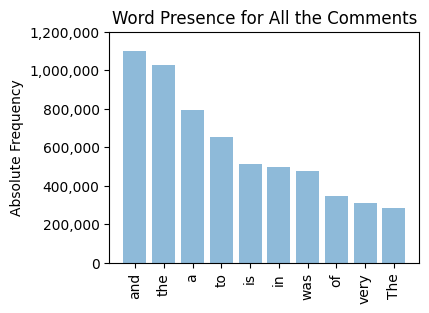

In [ ]:
# Presenting in a bar chart the most used words in the comments, for both the listed and unlisted
# Airbnbs.
x_labels = freq.index[0:10]
values = freq[:10]
plt.figure(figsize=(4,3))
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000],
           ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000'])
plt.xticks(x_labels)
plt.ylabel('Absolute Frequency')
plt.title('Word Presence for All the Comments')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Now we will want to perform the same analysis but segregating between the comments
# that were made in listed Airbnbs and unlisted Airbnbs. To do that, first we will have to
# merge the label of each Airbnb from the "df_train_original" datset with the comments made
# made to that Airbnb, which as we have been seeing unitl now can be obtained from the "df_train_reviews_original".
# For simplicity reasons we are going to merge it with the "comments_size_df" that we created previously.
comments_size_label_df = pd.merge(comments_size_df, df_train_original[["index", "unlisted"]], on="index", how="left")

In [ ]:
# Now we will separate it into two different DataFrames, one that have the comments of all the Airbnbs
# that were unlisted in following quarter, and another DataFrame that have the comments of all the Airbnbs
# that were listed in following quarter.
comments_size_label_listed_df = comments_size_label_df[comments_size_label_df["unlisted"] == 0]
comments_size_label_unlisted_df = comments_size_label_df[comments_size_label_df["unlisted"] == 1]

In [ ]:
# Joining all the comments from listed airbnbs into an unique list.
unique_string_listed = ' '.join(str(comment) for comment in comments_size_label_listed_df["comments"])

# Now, separating the string by each " ", and creating a list with all the words.
unique_string_listed_list = unique_string_listed.split()

In [ ]:
# Creating a series with the frequency of each word.
freq_listed = pd.Series(unique_string_listed_list).value_counts()

In [ ]:
# We can also see that taking into considerationn only the comment from listed Airbnbs the most used
# words are articles, prepositions, conjuctions, adverbs, and nouns, which are not that informative.
freq_listed.sort_values(ascending=False)[0:10]

and     1056346
the      986976
a        760502
to       627158
is       490781
in       477719
was      457059
of       334755
very     298811
The      273994
dtype: int64

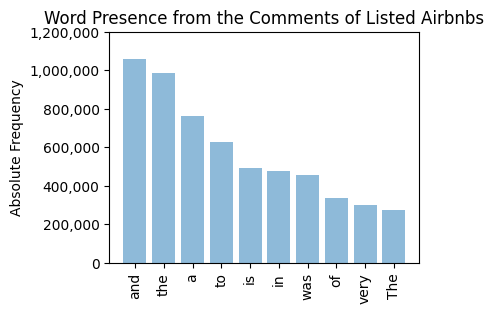

In [ ]:
# Presenting in a bar chart the most used words in the comments from listed Airbnbs.
x_labels = freq_listed.index[0:10]
values = freq_listed[:10]
plt.figure(figsize=(4,3))
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.yticks([0, 200000, 400000, 600000, 800000, 1000000, 1200000],
           ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000'])
plt.xticks(x_labels)
plt.ylabel('Absolute Frequency')
plt.title('Word Presence from the Comments of Listed Airbnbs')
plt.xticks(rotation=90)
plt.show()

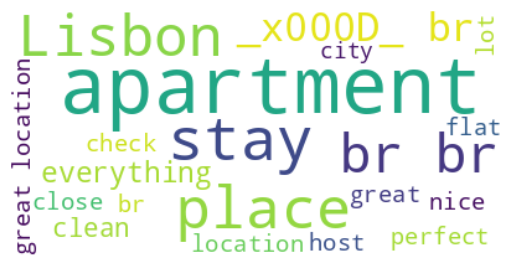

In [ ]:
# Presenting a word-search for the most used words on the comments made
# to Airbnbs that are listed in the following quarter. As it is too computationally
# costly to incorporate in it the 700k comments we have from our training set we are just
# going to use the fist 50k comments. By default it doesn't take into consideration the
# stop words and eliminate them.

unique_string_listed_cloud = ' '.join(str(comment) for comment in comments_size_label_listed_df["comments"][:50000])
wordcloud_listed = WordCloud(background_color='white', max_words=20).generate(unique_string_listed_cloud)
plt.imshow(wordcloud_listed, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Joining all the comments from unlisted airbnbs into an unique list.
unique_string_unlisted = ' '.join(str(comment) for comment in comments_size_label_unlisted_df["comments"])

# Now, separating the string by each " ", and creating a list with all the words.
unique_string_unlisted_list = unique_string_unlisted.split()

In [ ]:
# Creating a series with the frequency of each word.
freq_unlisted = pd.Series(unique_string_unlisted_list).value_counts()

In [ ]:
# We can also see that taking into considerationn only the comment from unlisted Airbnbs the most used
# words are articles, prepositions, conjuctions, adverbs, and nouns, which are not that informative.
freq_unlisted.sort_values(ascending=False)[0:10]

and     42062
the     41218
a       32517
to      26080
is      21119
in      19627
was     19300
of      13136
de      12827
very    12684
dtype: int64

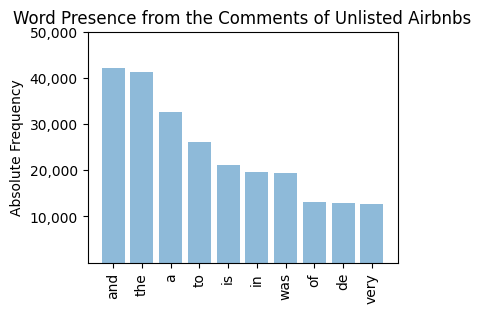

In [ ]:
# Presenting in a bar chart the most used words in the comments from unlisted Airbnbs.
x_labels = freq_unlisted.index[0:10]
values = freq_unlisted[:10]
plt.figure(figsize=(4,3))
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.yticks([10000, 20000, 30000, 40000, 50000],
           ['10,000', '20,000', '30,000', '40,000', '50,000'])
plt.xticks(x_labels)
plt.ylabel('Absolute Frequency')
plt.title('Word Presence from the Comments of Unlisted Airbnbs')
plt.xticks(rotation=90)
plt.show()

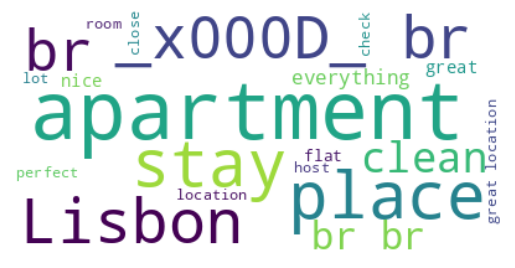

In [ ]:
# Presenting a word-search for the most used words on the comments made
# to Airbnbs that are unlisted in the following quarter. By default it doesn't
# take into consideration the stop words and eliminate them.
unique_string_unlisted_cloud = ' '.join(str(comment) for comment in comments_size_label_unlisted_df["comments"])
wordcloud_unlisted = WordCloud(background_color='white', max_words=20).generate(unique_string_unlisted_cloud)
plt.imshow(wordcloud_unlisted, interpolation='bilinear')
plt.axis('off')
plt.show()

**Conclusion:** As expected the words that are identified the most are articles, prepositions, conjuctions, adverbs, and nouns. Even when segregating between the Airbnbs that are going to be unlisted and the ones that will stay listed we once again find these types of word. In the wordcloud when not considering the articles, prepositions, conjuctions, adverbs, and nouns we can in fact see diferent words but they are not very conclusive on the quest to find the target. When segregating the words that appear in the word cloud also seem to be very similar.

#### 1.5.3. Number of Comments Analysis

In [ ]:
# Creating a table that has the total number of comments by index.
number_comments = df_train_reviews_original.groupby('index').count()

In [ ]:
# Sorting by the number of comments per Airbnb.
number_comments.sort_values("comments")

,comments
index,
7947,1
6760,1
2503,1
728,1
5331,1
...,...
3396,765
6720,788
265,891


In [ ]:
# Let's merge the previously created DataFrame "number_comments" and merge it on the left
# with the "df_train_original" on the left. This way we will be able to segment this analysis
# by label (listed or not).
number_comment_label_df = pd.merge(df_train_original, number_comments, on="index", how="left")

# The Airbnbs that don't have any comment made for them will have NaN in the "comments" column,
# fot this cases we will replace the null values with the value 0, because we want it to have an
# effect on the mean and in the other descriptive statistics.
number_comment_label_df['comments'].fillna(0, inplace=True)
number_comment_label_df

,index,description,host_about,unlisted,comments
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,50.0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,0.0
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,0.0
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,0.0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,41.0
...,...,...,...,...,...
12491,12492,CAT’S BY BAIRRO ALTO<br /><br />This cozy apar...,Travelling is one of my favorite hobbies. I've...,0,312.0
12492,12493,Beautifully located in the heart of Lisbon's h...,Founded by travel enthusiasts (just like you) ...,0,35.0
12493,12494,Enjoy breakfast in the sleek kitchen with its ...,I´m from Portugal and I love to dance and to t...,0,209.0
12494,12495,A Terra da Eira é uma casa de campo rodeada de...,Somos uma familia de 5. Gostamos de viajar e d...,1,0.0


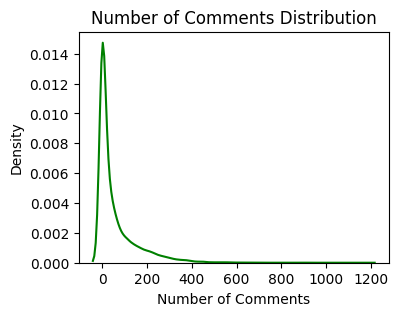

In [ ]:
# Initializing the size of our density graph.
plt.figure(figsize=(4,3))

# Initiating the density graph. Setting the name of the label and choosing green as a color.
sns.kdeplot(data = number_comment_label_df["comments"], label="Number of Comments Distribution", color="green")

# Formatting the title and the labels.
plt.xlabel("Number of Comments")
plt.ylabel("Density")
plt.title("Number of Comments Distribution")

# Plotting the graph.
plt.show()

In [ ]:
# Presenting some descriptive statistics.
number_comment_label_df["comments"].describe()

count    12496.000000
mean        57.730634
std         89.853081
min          0.000000
25%          0.000000
50%         18.000000
75%         76.000000
max       1175.000000
Name: comments, dtype: float64

In [ ]:
# This way we can analyse the number of comments per label. That is we can try to find a relation
# between the number of comments per Airbnb listing and the fact of the Airbnb being lister or not
# in the following quarter.
number_comment_label_unlisted_df = number_comment_label_df[number_comment_label_df["unlisted"]==1]
number_comment_label_listed_df = number_comment_label_df[number_comment_label_df["unlisted"]==0]

In [ ]:
# Checking the number of comments by Airbnb for the Airbnbs that are going to be unlisted in the following quarter.
number_comment_label_unlisted_df["comments"].sort_values()

1          0.0
8066       0.0
8067       0.0
8073       0.0
8079       0.0
         ...  
10292    354.0
5024     384.0
4378     415.0
11683    454.0
7402     600.0
Name: comments, Length: 3463, dtype: float64

In [ ]:
# Checking the descriptive statistics regarding number of comments for the Airbnb's that are going to be unlisted.
number_comment_label_unlisted_df["comments"].describe()

count    3463.000000
mean        8.523535
std        35.656158
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       600.000000
Name: comments, dtype: float64

In [ ]:
# Checking the number of comments by Airbnb for the Airbnbs that are still going to be listed in the following quarter.
number_comment_label_listed_df["comments"].sort_values()

8108        0.0
6725        0.0
1484        0.0
11229       0.0
9862        0.0
          ...  
3395      765.0
6719      788.0
264       891.0
9373      896.0
8910     1175.0
Name: comments, Length: 9033, dtype: float64

In [ ]:
# Checking the descriptive statistics regarding number of comments for the Airbnb's that are still going to be listed
# in the next quarter.
number_comment_label_listed_df["comments"].describe()

count    9033.000000
mean       76.595262
std        96.940676
min         0.000000
25%         9.000000
50%        39.000000
75%       109.000000
max      1175.000000
Name: comments, dtype: float64

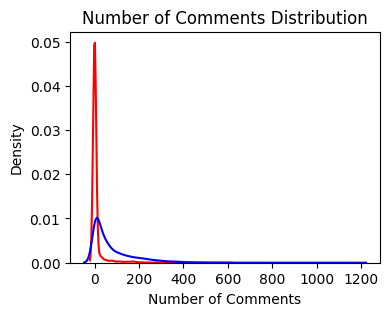

In [ ]:
# Initializing the size of our density graph.
plt.figure(figsize=(4,3))

# Initiating the density graph.
# Plotting one line for the distribution of the number of comments for each one of the labels.
sns.kdeplot(data = number_comment_label_unlisted_df["comments"], label="Number of Comments Distribution for Unlisted", color="red")
sns.kdeplot(data = number_comment_label_listed_df["comments"], label="Number of Comments Distribution for Listed", color="blue")

# Formatting the title and the labels.
plt.xlabel("Number of Comments")
plt.ylabel("Density")
plt.title("Number of Comments Distribution")

# Plotting the graph.
plt.show()

**Conclusion:** When taking into consideration all the labels together we can see that the average number of comments per Airbnb is 57 comments, being 1175 comments the maximum of comments for an Airbnb. When looking at the distribution we can see that it is positevely skewed, as the maximum is 1175, but then the 1st, 2nd, and 3rd quartile are respectively 0, 18, and 76 comments. Then when we segregate the number of comments by each label we can draw some important conclusions. We verify that for the airbnbs that are unlisted the average number of comments is 8, while for the airbnbs that stay listed this number is 76. Looking at the distribution of both cases, we see that it is much more concentrated around the 0 value for Airbnbs that are unlisted, while for the ones that stay listed the number of comments varies much more (with higher number of comments). From here at first sight we can conclude that there is a correlation between the number of comments and the fact of it being listed or not in the upcoming quarter. Higher the number of comments of an Airbnb bigger the probability of it being in the upcoming quarter, which actually makes sense. We will compute this correlation later.

### 1.6. Description and Host About Analysis

For the Host and Description analysis we are not going to do a Word Analysis as the word analysis from the comments was very inclocusive and we believe that this one will be the same. Nonetheless, we will perform an analysis regarding their length, presenting some descriptive statistics, the distribution and trying to find if it has an impact on the airbnb being listed or not in the following quarter.

#### 1.6.1. Description Length Analysis

In [ ]:
# Selecting the column of "description" from the "df_train_original".
all_descriptions = df_train_original["description"]

# Opening an empty dictionary that will receive the index and the size in
# terms of words of each one of the descriptions.
number_words_descriptions = {}

# Starting a for loop that will iterate over every description.
for number, comment in enumerate(all_descriptions):

  # Transforming every description on a string as we will need it to then use the
  # .split method.
  string_comment = str(comment)

  # Splitting every string on " ", ".", and "-".
  comment_splited = re.split(r'\s|,|-|，', string_comment)

  # Counting the number of words of every description and storing its value on the
  # previously created dictionary.
  number_words_descriptions[number] = len(comment_splited)

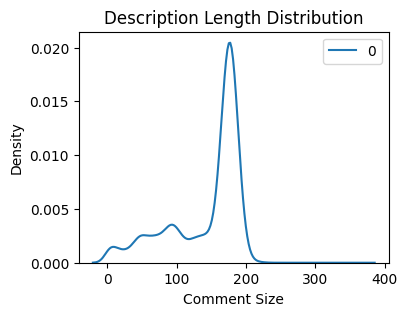

In [ ]:
# Initializing the size of our density graph.
plt.figure(figsize=(4,3))

# Initiating the density graph. Setting the name of the label and choosing green as a color.
sns.kdeplot(data = number_words_descriptions.values(), label="Description Length Distribution", color="green")

# Formatting the title and the labels.
plt.xlabel("Description Size")
plt.ylabel("Density")
plt.title("Description Length Distribution")

# Plotting the graph.
plt.show()

In [ ]:
# Creating a DataFrame that has all the needed elements of the original "df_train_original"
# but now also has the number of words of each one of the descriptions.
descriptions_size_df = pd.DataFrame({"index": list(df_train_original["index"]), "descriptions":list(all_descriptions),"unlisted":list(df_train_original["unlisted"]) ,"size":list(number_words_descriptions.values())})
descriptions_size_df

,index,descriptions,unlisted,size
0,1,"This is a shared mixed room in our hostel, wit...",0,140
1,2,"O meu espaço fica perto de Parque Eduardo VII,...",1,28
2,3,Trafaria’s House is a cozy and familiar villa ...,1,183
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",0,51
4,5,Joli appartement en bordure de mer.<br /> 2 m...,0,114
...,...,...,...,...
12491,12492,CAT’S BY BAIRRO ALTO<br /><br />This cozy apar...,0,180
12492,12493,Beautifully located in the heart of Lisbon's h...,0,171
12493,12494,Enjoy breakfast in the sleek kitchen with its ...,0,46
12494,12495,A Terra da Eira é uma casa de campo rodeada de...,1,118


In [ ]:
# Presenting some descriptive statistics of the size of the descriptions.
descriptions_size_df["size"].describe()

count    12496.000000
mean       142.395647
std         52.239437
min          3.000000
25%        105.000000
50%        169.000000
75%        179.000000
max        362.000000
Name: size, dtype: float64

In [ ]:
# Checking which is the smallest and highest description.
descriptions_size_df.sort_values(by="size")

,index,descriptions,unlisted,size
11444,11445,<b>License number</b><br />90252/AL,0,3
6880,6881,<b>License number</b><br />Exempt,1,3
8142,8143,<b>License number</b><br />1209485495,1,3
10192,10193,<b>License number</b><br />97404/AL,1,3
10198,10199,<b>License number</b><br />77576/AL,0,3
...,...,...,...,...
11647,11648,"The apartment is comfortable, is very light, a...",0,219
12471,12472,The villa in Ericeira has 3 bedrooms and has c...,0,221
4256,4257,The villa in Ericeira has 3 bedrooms and has c...,1,226
3549,3550,The villa in Ericeira has 2 bedrooms and has c...,1,228


In [ ]:
# Segregating the previous dataframe according to the label.
descriptions_size_listed_df = descriptions_size_df[descriptions_size_df["unlisted"]==0]
descriptions_size_unlisted_df = descriptions_size_df[descriptions_size_df["unlisted"]==1]

In [ ]:
# Presenting some descriptive statistics for the size of comments for the Airbnbs that will remain listed in the upcoming quarter.
descriptions_size_listed_df["size"].describe()

count    9033.000000
mean      146.626149
std        49.283492
min         3.000000
25%       123.000000
50%       170.000000
75%       180.000000
max       221.000000
Name: size, dtype: float64

In [ ]:
# Presenting some descriptive statistics for the size of comments for the Airbnbs that will no longer be listed in the upcoming quarter.
descriptions_size_unlisted_df["size"].describe()

count    3463.000000
mean      131.360670
std        57.828749
min         3.000000
25%        87.000000
50%       164.000000
75%       178.000000
max       362.000000
Name: size, dtype: float64

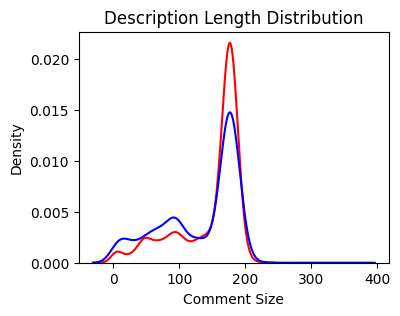

In [ ]:
# Initializing the size of our density graph.
plt.figure(figsize=(4,3))

# Producing one density line for each one of the previously created dataframes.
sns.kdeplot(data = descriptions_size_listed_df["size"], label="Description Length Distribution (Listed)", color="red")
sns.kdeplot(data = descriptions_size_unlisted_df["size"], label="Description Length Distribution (Unlisted)", color="blue")

# Formatting the title and the labels.
plt.xlabel("Description Size")
plt.ylabel("Density")
plt.title("Description Length Distribution")

# Plotting the graph.
plt.show()

**Conclusion**: When considering all the descriptions the average size of each description is 142 words, having the smalles description 3 words and the highest description 362 words. The 1st, 2nd, 3rd quartiles are 105, 168, and 179 respectively. When segregating by the label we see that the distribution although similar has on average smaller descriptions on the Airbnb's that are going to be unlisted in the following quarter. So it seems likes there is some degree of correlation between the size of a description and it being unlisted or not in the upcoming quarter. Later we will calculate this correlation.

#### 1.6.2. Host About Length Analysis

In [ ]:
# Selecting the column of "host_about" from the "df_train_original".
all_host_about = df_train_original["host_about"]

# Opening an empty dictionary that will receive the index and the size in
# terms of words of each one of the host about description.
number_words_host_about = {}

# Starting a for loop that will iterate over every host about description.
for number, comment in enumerate(all_host_about):

  # Transforming every host about description on a string as we will need it to then use the
  # .split method.
  string_comment = str(comment)

  # Splitting every string on " ", ".", and "-".
  comment_splited = re.split(r'\s|,|-|，', string_comment)

  # Counting the number of words of every host about description and storing its value on the
  # previously created dictionary.
  number_words_host_about[number] = len(comment_splited)

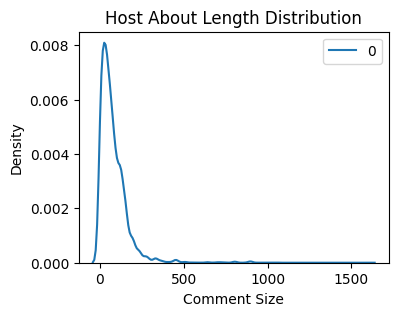

In [ ]:
# Initializing the size of our density graph.
plt.figure(figsize=(4,3))

# Initiating the density graph. Setting the name of the label and choosing green as a color.
sns.kdeplot(data = number_words_host_about.values(), label="Host About Length Distribution", color="green")

# Formatting the title and the labels.
plt.xlabel("Host About Size")
plt.ylabel("Density")
plt.title("Host About Length Distribution")

# Plotting the graph.
plt.show()

In [ ]:
# Creating a DataFrame that has all the needed elements of the original "df_train_original"
# but now also has the number of words of each one of the host about description made.
host_about_size_df = pd.DataFrame({"index": list(df_train_original["index"]), "host_about":list(all_host_about),"unlisted":list(df_train_original["unlisted"]) ,"size":list(number_words_host_about.values())})
host_about_size_df

,index,host_about,unlisted,size
0,1,Alojamento Local Registro: 20835/AL,0,4
1,2,"I am friendly host, and I will try to always b...",1,25
2,3,"I am a social person liking to communicate, re...",1,48
3,4,Hello!_x000D_\nI m Portuguese and i love to me...,0,33
4,5,Nous sommes une famille avec deux enfants de 1...,0,37
...,...,...,...,...
12491,12492,Travelling is one of my favorite hobbies. I've...,0,133
12492,12493,Founded by travel enthusiasts (just like you) ...,0,80
12493,12494,I´m from Portugal and I love to dance and to t...,0,23
12494,12495,Somos uma familia de 5. Gostamos de viajar e d...,1,23


In [ ]:
# Checking some descriptive statistics from the host about description size.
host_about_size_df["size"].describe()

count    12496.000000
mean        81.864757
std         90.389123
min          1.000000
25%         28.000000
50%         61.000000
75%        113.000000
max       1597.000000
Name: size, dtype: float64

In [ ]:
# Checking the smallest and longest host about description size.
host_about_size_df.sort_values(by="size")

,index,host_about,unlisted,size
5739,5740,LxBestSuite,1,1
5727,5728,Surf,0,1
5682,5683,LxBestSuite,1,1
10747,10748,...,1,1
10768,10769,Surf,0,1
...,...,...,...,...
1419,1420,life is so much more then nice words and so ca...,0,1049
5200,5201,life is so much more then nice words and so ca...,0,1049
3950,3951,life is so much more then nice words and so ca...,0,1049
2244,2245,Travel is life ! I love meeting people and hel...,0,1597


**Conclusion:** The average host about description size is 82, while its maximum and minimum are 1597 and 1, respectively. The 1st, 2nd, and 3rd quartiles are 28, 61, and 113 words, respectively. We can't conclude much more from the size of the host about description.

### 1.7. Correlation Analysis

Analysing the correlation between the labels and the length of the comments or the number of comments of an Airbnb Listing. This will help identify potential relationships that may impact it being listed or unlisted.

In [ ]:
# Analysing the correlation between quantity of comments and the label.
# Interpret the correlation coefficient.
correlation_comments_label = number_comment_label_df['comments'].corr(number_comment_label_df['unlisted'])
correlation_comments_label

-0.339095800875336

In [ ]:
# Analysing the correlation between size of the comments and the label.
# Interpret the correlation coefficient. Average comment size per index.
correlation_size_comments_label = comments_size_label_df["size"].corr(comments_size_label_df["unlisted"])
correlation_size_comments_label

0.0009834662438916065

In [ ]:
# Analysing the correlation between size of the description and the label.
correlation_descriptions_size_label = descriptions_size_df["size"].corr(descriptions_size_df["unlisted"])
correlation_descriptions_size_label

-0.13079783340696735

In [ ]:
# Analysing the correlation between size of the host_about and the label.
correlation_host_about_size_label = host_about_size_df["size"].corr(host_about_size_df["unlisted"])
correlation_host_about_size_label

0.0039708319893764395

**Conclusion:**

- As the correlation between the number of comments and the label is -0,33 they are slightly correlated and so one can expect that higher the number of comments of an Airbnb listing more likely it is to be listed in the upcoming quarter. And the other way around, the less comments an Airbnb have it is less likely to be listed in the upcoming quarter.

- As the correlation between the size of the description and the label is -0,13 they are slightly correlated and so one can expect that the longer the description of an Airbnb more likely it is to be listed in the upcoming quarter. And the other way around, the smaller is a description the less likely it is to be listed in the upcoming quarter.

- We can conclude nothing from the other two correlations we calculated as their value is very close to 0.